In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Bubble column setup:

Process Parameters

<p> Superficial gas velocity: </p> 
<div style="text-align: center">  $ v^c_{gs} = F_av/A/3600 $ </div>

<p> logarithmic mean pressure: </p> 
<div style="text-align: center">  $ p_m = (p_b-p_t)/log(p_b/p_t) $ </div>

In [24]:
#Universal constants:
R = 8.314 # [m^3*Pa/K/mol]

def celsius(t):
    return t-273.15

F_G = 1*10**4 #gas inflow rate (from Steph: (8*10**5 * 8.314 * T)/p_m) [m^3/h]
r = 3 # radius of the reactor [m]
h = 30 # height of the reactor [m]

#deduceable constants
A = math.pi * r**2 #reactor cross-sectional area [m^2]
V_L = A * h * 2/3 #reactor volume, assuming it is 2/3 filled [m^3]
v_gas = F_G/A/3600 #average gas velocity [m/s]
#Gas_holdup = 0.6*(v_gas)**0.7 #from Stephanie's paper
#V_G = V_L*Gas_holdup

p_t = 101325 # pressure at the top of the reactor [Pa]
p_b = p_t + h * 1000 * 9.81 # pressure at the bottom of the reactor [Pa]
p_m = (p_b-p_t)/math.log(p_b/p_t) # logarithmic mean pressure [Pa]

#define concentration of disolved gasses as minimum
c_co2 = c_co = c_h2 = c_o2 = 0

Define gas transfer rates as functions

In [3]:
# Constants:
# Diffusivity coefficient:
# E.L. Cussler, Diffusion - Mass Transfer in Fluid Systems, 2nd edition - Table 5.2-1
D0_CO = 2.03*10**(-5) #[cm2/s]
D0_CO2 = 1.92*10**(-5) #[cm2/s]
D0_H2 = 4.50*10**(-5) #[cm2/s]
D0_O2 = 2.10*10**(-5) #[cm2/s]
D0_N2 = 1.88*10**(-5) #[cm2/s]

# NIST Chemistry WebBook: https://webbook.nist.gov
theta = 1.022 # temperature correction factor
#Henry's law constant for solubility in water at 298.15 K
H0_CO = 0.00099 # [mol/kg*bar]
H0_CO2 = 0.035 # [mol/kg*bar]
H0_H2 = 0.00078 # [mol/kg*bar]
H0_O2 = 0.0013 # [mol/kg*bar]
H0_N2 = 0.0006 # [mol/kg*bar]

#temepratute correction factor k 
k_CO = 1300 # [K]
k_CO2 = 2400 # [K]
k_H2 = 500 # [K]
k_O2 = 1500 # [K]
k_N2 = 1300 # [K]

<p> Transfer rate: </p>
<div style="text-align: center"> $ R_{i} = k_La_T*(c^* -c_l) $ </div>
<p> Volumetric mass transfer coefficient: </p> 
<div style="text-align: center">  $ k_La_{20} = 0.32 * (D_i/D_{O_2})^{0.5} * (v^c_{gs})^{0.7} $ </div>
<!--<p> Temperature-corrected diffusion coefficient: </p> 
<div style="text-align: center">  $ D_{i_T} = (T/298.15)*(µ^0/µ_T)*D_{i_0}$ </div> -->
<p> Temperature corrected volumetric mass transfer coefficient: </p>
<div style="text-align: center">  $ k_La_T = k_La_{20} * \theta ^{T-293.15} $ </div>

    
<p> Saturation concentration: </p> 
<div style="text-align: center">  $ c^* = H_T*y*p $</div>
<p> Temperature-corrected Henry’s law constant: </p> 
<div style="text-align: center">  $ H_T = H_0*e^{[k_i*((1/T)-(1/298.15))]}*10^3 $</div>

<!--<p> Combined: </p>
<div style="text-align: center">  $ k_La_T = 0.32 * (D_i/D_{O_2})^{0.5} * (v^c_{gs})^{0.7} * \theta ^{T-293.15} $ </div>
<div style="text-align: center">  $ c^* = H_0*e^{[k_i*((1/T)-(1/298.15))]}*10^3*y*p $ </div>-->


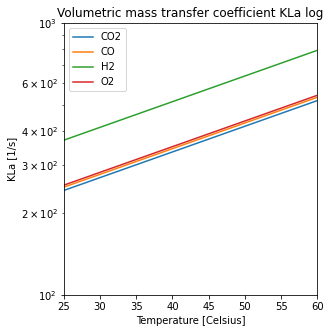

In [29]:
def KLa_CO2(t):
    return 0.32 * (D0_CO2/D0_O2)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]

def KLa_CO(t):
    return 0.32 * (D0_CO/D0_O2)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]

def KLa_H2(t):
    return 0.32 * (D0_H2/D0_O2)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]

def KLa_O2(t):
    return 0.32 * (1)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]

t = np.arange(293.15, 335.15, 1)

fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title(f"Volumetric mass transfer coefficient KLa log")
plt.plot(celsius(t), KLa_CO2(t))
plt.plot(celsius(t), KLa_CO(t))
plt.plot(celsius(t), KLa_H2(t))
plt.plot(celsius(t), KLa_O2(t))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([25, 60, 100, 1000])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('KLa [1/s]')
plt.yscale('log')

#plt.subplot(1,2,2)
#plt.title(f"Volumetric mass transfer coefficient KLa lin")
#plt.plot(t, KLa_CO2(t))
#plt.plot(t, KLa_CO(t))
#plt.plot(t, KLa_H2(t))
#plt.plot(t, KLa_O2(t))
#plt.legend(['CO2', 'CO', 'H2', 'O2'])
#plt.axis([293, 333, 0, 800])
#plt.xlabel('Temperature [Kelvin]')
#plt.ylabel('KLa [1/s]')
#plt.yscale('lin')

plt.show()

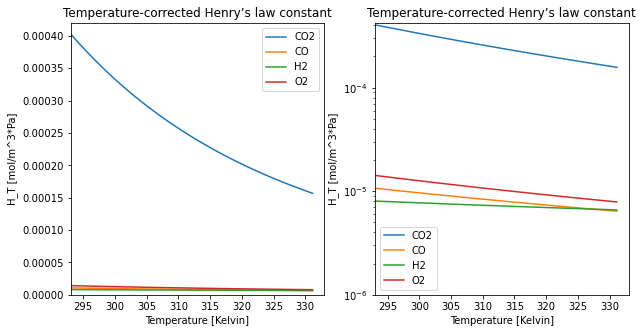

In [40]:
def HT_CO2(t):
    return H0_CO2 * math.e**(k_CO2*(1/t-1/298.15)) * 10**3 * 10**(-5) #[mol/m^3*Pa]

def HT_CO(t):
    return H0_CO * math.e**(k_CO*(1/t-1/298.15)) * 10**3 * 10**(-5) #[mol/m^3*Pa]

def HT_H2(t):
    return H0_H2 * math.e**(k_H2*(1/t-1/298.15)) * 10**3 * 10**(-5) #[mol/m^3*Pa]

def HT_O2(t):
    return H0_O2 * math.e**(k_O2*(1/t-1/298.15)) * 10**3 * 10**(-5) #[mol/m^3*Pa]

t = np.arange(293.15, 332.15, 1)

fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title(f"Temperature-corrected Henry’s law constant")
plt.plot(t, HT_CO2(t))
plt.plot(t, HT_CO(t))
plt.plot(t, HT_H2(t))
plt.plot(t, HT_O2(t))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([293, 333, 0, 0.00042])
plt.xlabel('Temperature [Kelvin]')
plt.ylabel('H_T [mol/m^3*Pa]')

plt.subplot(1,2,2)
plt.title(f"Temperature-corrected Henry’s law constant")
plt.plot(t, HT_CO2(t))
plt.plot(t, HT_CO(t))
plt.plot(t, HT_H2(t))
plt.plot(t, HT_O2(t))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.xlabel('Temperature [Kelvin]')
plt.ylabel('H_T [mol/m^3*Pa]')
plt.axis([293, 333, 0.000001, 0.00042])
plt.yscale('log')

plt.show()

Text(0, 0.5, 'RT [mol/m^3/s]')

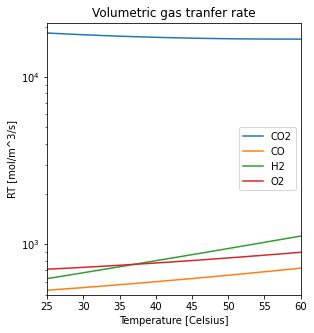

In [31]:
def R_CO2(t):
    #DT_CO = t/298.15 * 1/(((298.15+118)/(t+118))*(t/298.15)**(3/2)) * D0_CO #[cm2/s]
    #DT_O2 = t/298.15 * 1/(((298.15+127)/(t+127))*(t/298.15)**(3/2)) * D0_O2 #[cm2/s]
    KLa_CO2 = 0.32 * (D0_CO2/D0_O2)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]
    HT_CO2 = H0_CO2 * math.e**(k_CO2*(1/t-1/298.15)) * 10**3 * 10**(-5) #[mol/m^3*Pa]
    return KLa_CO2 * (HT_CO2 * p_m - c_co2)

def R_CO(t):
    #DT_CO = t/298.15 * 1/(((298.15+118)/(t+118))*(t/298.15)**(3/2)) * D0_CO #[cm2/s]
    #DT_O2 = t/298.15 * 1/(((298.15+127)/(t+127))*(t/298.15)**(3/2)) * D0_O2 #[cm2/s]
    KLa_CO = 0.32 * (D0_CO/D0_O2)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]
    HT_CO = H0_CO * math.e**(k_CO*(1/t-1/298.15)) * 10**3 * 10**(-5) #[mol/m^3*Pa]
    return KLa_CO * (HT_CO * p_m - c_co)

def R_H2(t):
    #DT_H2 = t/298.15 * 1/(((298.15+72)/(t+72))*(t/298.15)**(3/2)) * D0_H2 #[cm2/s]
    #DT_O2 = t/298.15 * 1/(((298.15+127)/(t+127))*(t/298.15)**(3/2)) * D0_O2 #[cm2/s]
    KLa_H2 = 0.32 * (D0_H2/D0_O2)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]
    HT_H2 = H0_H2 * math.e**(k_H2*(1/t-1/298.15)) * 10**3 * 10**(-5) #[mol/m^3*Pa]
    return KLa_H2 * (HT_H2 * p_m - c_h2)

def R_O2(t):
    KLa_O2 = 0.32 * (1)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]
    HT_O2 = H0_O2 * math.e**(k_O2*(1/t-1/298.15)) * 10**3 * 10**(-5) #[mol/m^3*Pa]
    return KLa_O2 * (HT_O2 * p_m - c_o2)

t = np.arange(293.15, 335.15, 1)

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title(f"Volumetric gas tranfer rate")
plt.plot(celsius(t), R_CO2(t))
plt.plot(celsius(t), R_CO(t))
plt.plot(celsius(t), R_H2(t))
plt.plot(celsius(t), R_O2(t))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([25, 60, 500, 21000])
plt.yscale('log')
plt.xlabel('Temperature [Celsius]')
plt.ylabel('RT [mol/m^3/s]')

#plt.subplot(1,2,2)
#plt.title(f"Gas tranfer rate lin")
#plt.plot(t, R_CO2(t))
#plt.plot(t, R_CO(t))
#plt.plot(t, R_H2(t))
#plt.plot(t, R_O2(t))
#plt.legend(['CO2', 'CO', 'H2', 'O2'])
#plt.axis([293, 333, 0, 21000])
#plt.xlabel('Temperature [Kelvin]')
#plt.ylabel('RT [mol/m^3/s]')
#plt.show()

In [9]:
R_H2(295)/R_H2(330)

0.5588420112311575

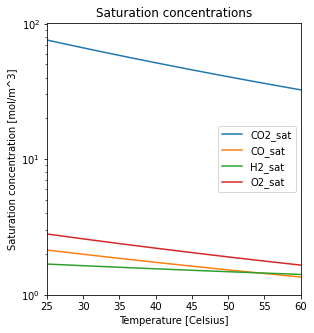

In [34]:
def CO2_sat(t):
    return H0_CO2 * math.e**(k_CO2*(1/t-1/298.15)) * 10**3 * 10**(-5) * p_m

def CO_sat(t):
    return H0_CO * math.e**(k_CO*(1/t-1/298.15)) * 10**3 * 10**(-5) * p_m

def H2_sat(t):
    return H0_H2 * math.e**(k_H2*(1/t-1/298.15)) * 10**3 * 10**(-5) * p_m

def O2_sat(t):
    return H0_O2 * math.e**(k_O2*(1/t-1/298.15)) * 10**3 * 10**(-5) * p_m

t = np.arange(293.15, 335.15, 1)

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title(f"Saturation concentrations")
plt.plot(celsius(t), CO2_sat(t))
plt.plot(celsius(t), CO_sat(t))
plt.plot(celsius(t), H2_sat(t))
plt.plot(celsius(t), O2_sat(t))
plt.legend(['CO2_sat', 'CO_sat', 'H2_sat', 'O2_sat'])
plt.axis([25, 60, 1, 101])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('Saturation concentration [mol/m^3]')
plt.yscale('log')

#plt.subplot(1,2,2)
#plt.title(f"Saturation concentrations lin")
#plt.plot(t, CO2_sat(t))
#plt.plot(t, CO_sat(t))
#plt.plot(t, H2_sat(t))
#plt.plot(t, O2_sat(t))
#plt.legend(['CO2_sat', 'CO_sat', 'H2_sat', 'O2_sat'])
#plt.axis([293, 333, 0, 101])
#plt.xlabel('Temperature [Kelvin]')
#plt.ylabel('c* [mol/m^3]')
#plt.yscale('log')
#plt.show()

# Gathered

Text(0, 0.5, 'KLa [1/s]')

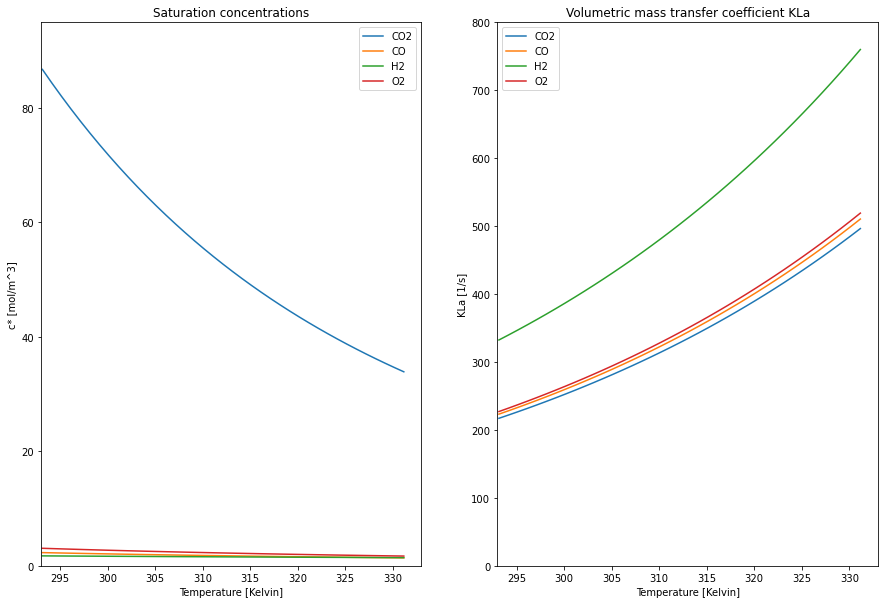

In [17]:
fig = plt.figure(figsize=(15,10))

#Output results
plt.subplot(1,2,1)
plt.title(f"Saturation concentrations")
plt.plot(t, CO2_sat(t))
plt.plot(t, CO_sat(t))
plt.plot(t, H2_sat(t))
plt.plot(t, O2_sat(t))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([293, 333, 0, 95])
plt.xlabel('Temperature [Kelvin]')
plt.ylabel('c* [mol/m^3]')

plt.subplot(1,2,2)
plt.title(f"Volumetric mass transfer coefficient KLa")
plt.plot(t, KLa_CO2(t))
plt.plot(t, KLa_CO(t))
plt.plot(t, KLa_H2(t))
plt.plot(t, KLa_O2(t))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([293, 333, 0, 800])
plt.xlabel('Temperature [Kelvin]')
plt.ylabel('KLa [1/s]')

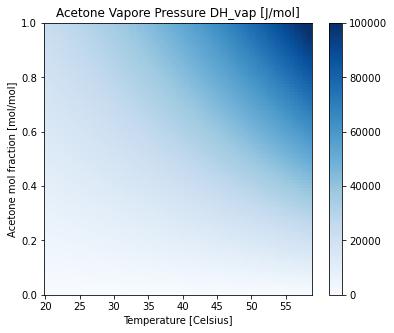

In [39]:
# generate 2 2d grids for the x & y bounds
t, x = np.meshgrid(np.linspace(293, 332, 100), np.linspace(0, 1, 100))

DH_vap = 3.1 * 10**(4) #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C67641&Mask=4#Thermo-Phase
R = 8.314 #[J * K^−1 * mol^−1]
T0, P0 = 272.95, 9290 #http://www.ddbst.com/en/EED/PCP/VAP_C4.php

#Calculate the constant C, the intersection with the y-axis
C = np.log(P0) + DH_vap/(R*T0)

z = np.exp(-DH_vap/(R*t) + C) * x
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = 0, 100000 #-np.abs(z).max(), np.abs(z).max()

#fig = plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(6,5))

c = ax.pcolormesh(celsius(t), x, z, cmap='Blues', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
plt.title(f"Acetone Vapore Pressure DH_vap [J/mol]")
plt.xlabel('Temperature [Celsius]')
plt.ylabel('Acetone mol fraction [mol/mol]')
# set the limits of the plot to the limits of the data
ax.axis([celsius(t.min()), celsius(t.max()),x.min(), x.max()])
fig.colorbar(c, ax=ax)

plt.show()

Text(0, 0.5, 'Ratio on water [mol/mol]')

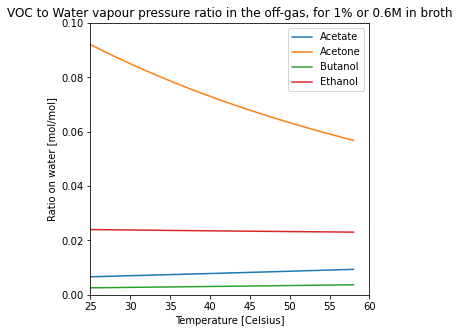

In [49]:
x = 0.01
T0_PP = 293.15 # [K]

#Enthalpy of vaporization
DH_vap_H2O = 4.3 * 10**4 #J/mol no single source, range 4.6-4.0 between 0-100°C
DH_vap_Actt = 5.16 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C64197&Units=SI&Mask=4#Thermo-Phase
DH_vap_MetOH = 3.76 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C67561&Units=SI&Mask=4#Thermo-Phase
DH_vap_EtOH = 4.2 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C64175&Units=SI&Mask=4#Thermo-Phase
DH_vap_PropOH = 4.7 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C71238&Units=SI&Mask=4#Thermo-Phase
DH_vap_ButOH = 5.2 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C71363&Units=SI&Mask=4#Thermo-Phase
DH_vap_Butnon = 3.4 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C78933&Units=SI&Mask=4#Thermo-Phase
DH_vap_Butyrt = 5.9 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C107926&Units=SI&Mask=4#Thermo-Phase
DH_vap_Butdiol = 7.8 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C110634&Units=SI&Mask=4#Thermo-Phase
DH_vap_Actn = 3.1 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C67641&Mask=4#Thermo-Phase

#From: http://www.ddbst.com/en/EED/PCP/PCPindex.php
P0_H2O = 2400.0 # [Pa] at 293.15K http://www.ddbst.com/en/EED/PCP/VAP_C174.php
P0_Actt = 1.5 * 10**3  # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0363&p_version=2
P0_MetOH = 12.9 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0057&p_version=2
P0_EtOH = 5.8 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0044&p_version=2
P0_PropOH = 2.0 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_version=2&p_card_id=0553
P0_ButOH = 0.58 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0111&p_version=2
P0_Butnon = 10.5 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0179&p_version=2
P0_Butyrt = 57 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=1334&p_version=2
P0_Butdiol = 10 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0395&p_version=2
P0_Actn = 24 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0087&p_version=2

def Pt(P0, T0, DH_vap, t, x):
    C = np.log(P0) + DH_vap/(R*T0) #Calculate the constant C, the intersection with the y-axis
    return np.exp(-DH_vap/(R*t) + C) * x

plt.figure(figsize=(5,5))
plt.title(f"VOC to Water vapour pressure ratio in the off-gas, for {round(x*100)}% or {round(x*55555/1000,1)}M in broth")
plt.plot(celsius(t), Pt(P0_Actt, T0_PP, DH_vap_Actt, t, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, t, 1))
plt.plot(celsius(t), Pt(P0_Actn, T0_PP, DH_vap_Actn, t, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, t, 1))
plt.plot(celsius(t), Pt(P0_ButOH, T0_PP, DH_vap_ButOH, t, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, t, 1))
plt.plot(celsius(t), Pt(P0_EtOH, T0_PP, DH_vap_EtOH, t, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, t, 1))
plt.legend(["Acetate","Acetone","Butanol","Ethanol"])
plt.xlabel('Temperature [Celsius]')
plt.axis([25, 60, 0, 0.1])
plt.ylabel('Ratio on water [mol/mol]')